# **Diabetes Prediction Analysis Report** #
**Date**: 15th Aug, 2024

**Prepared by**: Angad Kannaujiya

## **1. Introduction** ##

Diabetes is a chronic condition characterized by high levels of sugar (glucose) in the blood. Early prediction and diagnosis of diabetes can significantly improve patient outcomes. This report presents the findings of a logistic regression analysis conducted to predict whether an individual has diabetes based on certain health indicators.

## **2. Objective** ##

The primary objective of this analysis is to build a predictive model using logistic regression to classify whether a person has diabetes (binary classification: Yes/No) based on the features available in the dataset.

## **3. Dataset Overview** ##

* **Source**: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
* **Number of Instances**: Observations = 768
* **Number of Features**: Features = 8 (excluding the target variable)
* **Target Variable**: Outcome (1: Diabetes, 0: No Diabetes)

**Features** 
* **Pregnancies**: Number of times pregnant
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **Blood Pressure**: Diastolic blood pressure (mm Hg)
* **Skin Thickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **Diabetes Pedigree Function**: A function which scores likelihood of diabetes based on family history
* **Age**: Age (years)

## **4. Data Preprocessing** ##

* **Handling Missing Values**: Checked for missing values and ensured data integrity.
* **Feature Scaling**: Applied standardization to the features to bring all variables to a similar scale, using StandardScaler.
* **Data Splitting**: The dataset was split into training (80%) and testing (20%) sets to evaluate the model's performance.

## **5. Logistics Regression Model**

* **Algorithm**: Logistic Regression was chosen for its effectiveness in binary classification problems.
* **Training**: The model was trained on the training data using the scikit-learn library.
* **Testing**: Predictions were made on the testing dataset to evaluate the model's performance.

## **6. Model Evaluation**

#### **6.1 Accuracy**

The model achieved an accuracy of 80% on the test data. Accuracy measures the percentage of correct predictions made by the model.

#### **6.2 Confusion Matrix**

The confusion matrix provides a detailed breakdown of the model's performance:

               | Predicted:Diabetes	       |    Predicted: No Diabetes|

Actual: Yes    |     TP(89)        I           |         FN(13)               |

Actual: No     |    	FP(17)	               |           TN(35)            |


#### **6.3 Classification Report**

# **Code**

### **Step 1. Import the necessary libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### **Step 2. Load the dataset**

In [3]:
filepath = "H:\My Drive\Code Script\Python Code Script\Portfolio\Logistics Regression\diabetes.csv"
df_pima = pd.read_csv(filepath)
df_pima.head()

<positron-console-cell-3>:1: SyntaxWarning: invalid escape sequence '\M'


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Step 3. Explore the data**

In [4]:
df_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### **Visual Exploration**

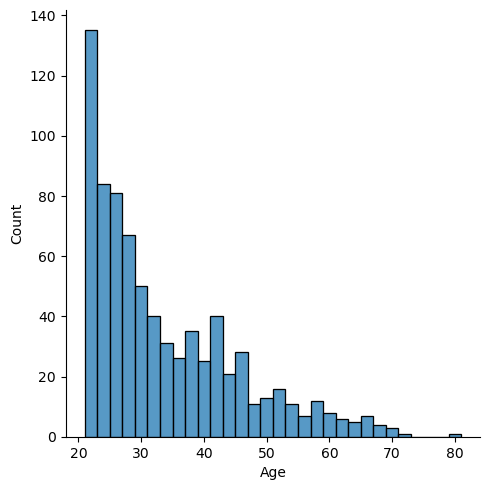

In [5]:
sns.displot(df_pima['Age'], bins=30)

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

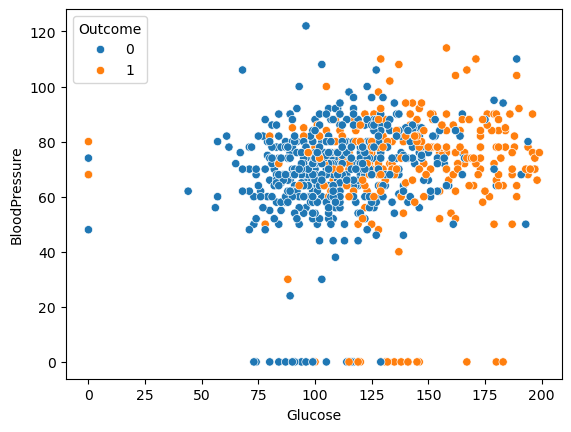

In [18]:
sns.scatterplot(data=df_pima, x='Glucose', y='BloodPressure', hue='Outcome')

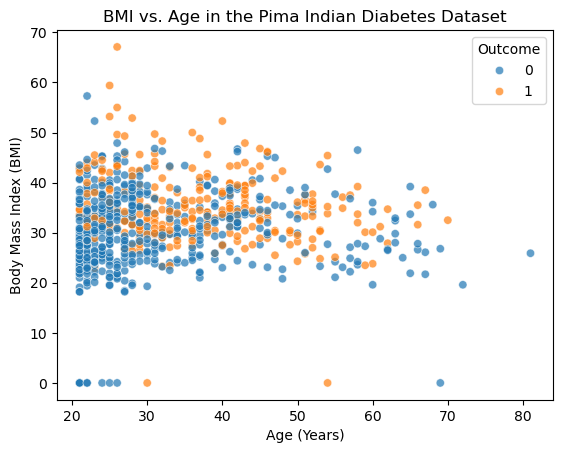

In [21]:
sns.scatterplot(data=df_pima, x='Age', y='BMI', hue='Outcome', alpha=0.7)
plt.title('BMI vs. Age in the Pima Indian Diabetes Dataset')
plt.xlabel('Age (Years)')
plt.ylabel('Body Mass Index (BMI)')
plt.legend(title='Outcome')

### **Step 4. Preprocess Data**

#### **Handlimg missing values**

In [ ]:
df_pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### **Seperate features and target variables**

In [8]:
X = df_pima.drop("Outcome", axis=1)
y = df_pima["Outcome"]

#### **Split the data into traning and testing sets**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#### **Feature scaling**

### **Step 5. Model Creation**

#### **Initialize the Logistics Regression model**

In [11]:
log_reg = LogisticRegression()


#### **Fit the model to training data**

In [12]:
log_reg.fit(X_train, y_train)

C:\Users\Angad\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### **Predict Labels for the test set**

In [13]:
y_pred = log_reg.predict(X_test)

### **Step 6. Evaluate the model**

#### **Calculate the accuracy**

In [14]:
print(accuracy_score(y_test, y_pred))

0.8051948051948052


#### **Confusion matrix**

In [15]:
print(confusion_matrix(y_test, y_pred))

[[89 13]
 [17 35]]


#### **Classification report**

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       102
           1       0.73      0.67      0.70        52

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154

